# Template Matching

It is the simplest form of object detection ,and scan a larger image for a provided target template by sliding the template target image across the larger image.

the main option that can be adjusted is the method of sliding the template across the target, and all of them is sort of **correlation based** metrics.

Check out the link for math information on different correlation methods: https://docs.opencv.org/4.x/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d

### Target(Full) Image

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

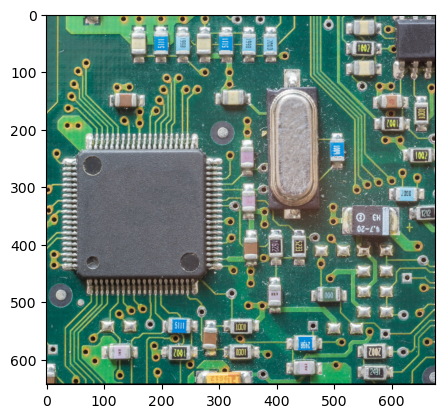

In [14]:
full = cv2.imread('images/circuit.png')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

### Template Image

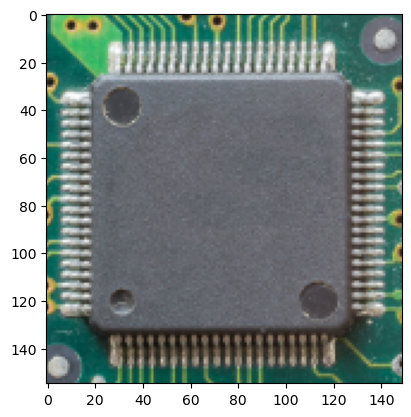

In [15]:
face= cv2.imread('images/circuit_piece.png')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [18]:
height, width,channels = face.shape
face.shape

(155, 149, 3)

In [11]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

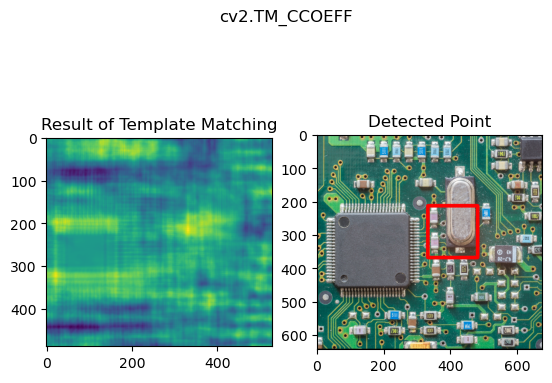

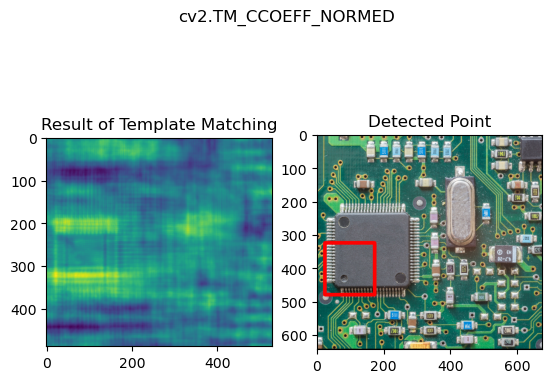

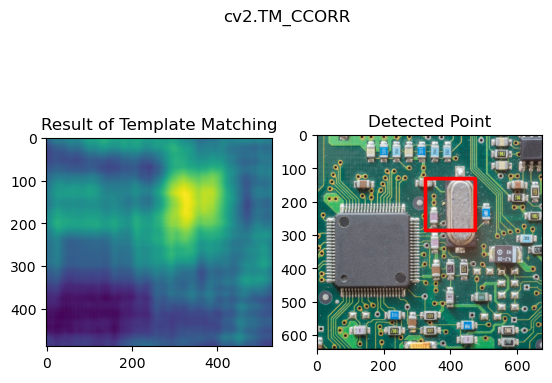

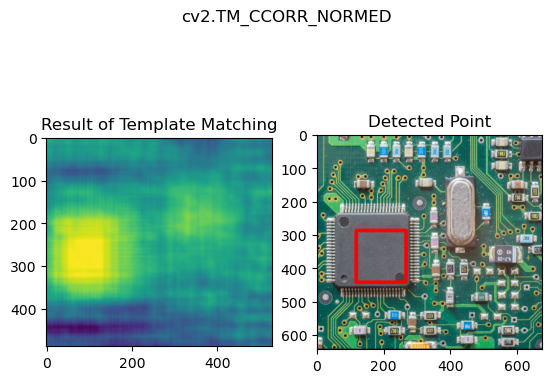

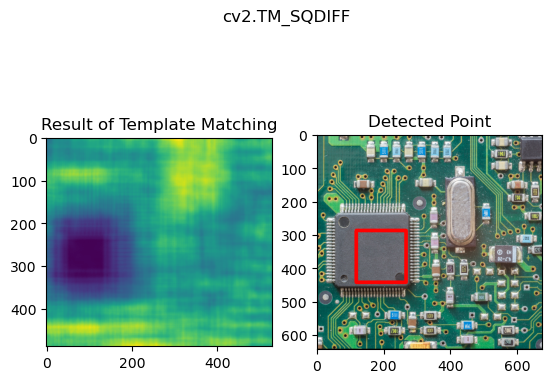

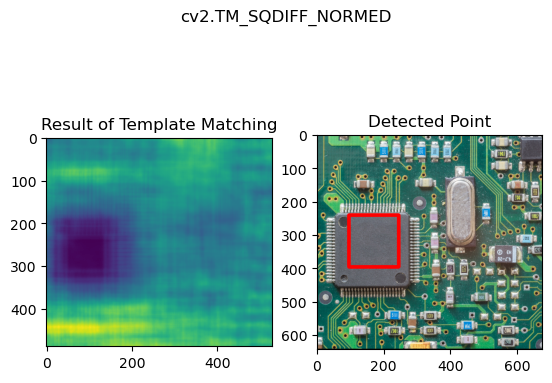

In [12]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')

In [1]:
# DEBUG: Modifiy the size of the template to the same size in the original image.